## Лабораторная работа № 4
## Бабичева Анна М8О-304Б-17
## Вариант № 2

Импортирую необходимые библиотеки, включая собственную matrix.

In [1]:
import numpy as np
import pandas as pd
import math
import pylab
import matplotlib.pyplot as plt
import random
import matrix

from numpy import arange
from numpy import meshgrid
from matplotlib import mlab
from sys import stdin
from copy import deepcopy

# Часть 1
### 4.1. Реализовать методы Эйлера, Рунге-Кутты и Адамса 4-го порядка в виде программ, задавая в качестве входных данных шаг сетки h. С использованием разработанного программного обеспечения решить задачу Коши для ОДУ 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением. 

Задача Коши:

\begin{equation}
    y''+y-2cosx=0
    \\
    y(0)=1
    \\
    y'(0)=0
\end{equation}

Точное решение:

\begin{equation}
    y=xsinx+cosx
\end{equation}

In [2]:
def f(x):
    return x * math.sin(x) + math.cos(x)

Первая производная:

$f'(x)=xcosx$

In [3]:
def dy(x):
    return x * math.cos(x)

Вторая производная:

$f''(x)=cosx-xsinx$

In [4]:
def ddy(x):
    return math.cos(x) - x * math.sin(x)

Исходную систему второго порядка свожу к системе первого порядка заменой $z=y'$:

\begin{cases}
   z=y'
   \\
   z'=2cosx-y
   \\
   y(0)=1
   \\
   z(0)=0
 \end{cases}

In [5]:
def dz(x, y, z):
    return -y + 2 * math.cos(x)

Погрешность буду считать $\surd{\sum_{i=1}^n(y_i-f(x_i)}$

In [6]:
def eps(x, y, f=f):
    return sum([(y[i] - f(x[i])) ** 2 for i in range(len(x))]) ** 0.5

def d_eps(x, z, dy=dy):
    return sum([(z[i] - dy(x[i])) ** 2 for i in range(len(x))]) ** 0.5

А также методом Рунге-Ромберга-Ридчардсона:

In [7]:
def RRR(y1, y2, h1, h2, p):
    if h1 < h2:
        return (sum([(y1[i * 2] - y2[i]) ** 2 for i in range(len(y2))]) ** 0.5) / ((h2 / h1) ** p - 1)
    return (sum([(y1[i] - y2[i * 2]) ** 2 for i in range(len(y1))]) ** 0.5) / ((h1 / h2) ** p - 1)

Явный метод Эйлера:

\begin{cases}
    y_k=y_{k-1}+hz_{k-1}
    \\
    z_k=z_{k-1}+hf(x_{k-1},y_{k-1},z_{k-1})
    \\
    x_k=x_{k-1}+h
\end{cases}

In [8]:
def Eiler(f=dz, y0=1, z0=0, h=0.1, a=0, b=1):
    x = np.arange(a, b + h, h)
    y = [y0]
    z = [z0]
    
    for i in range(1, len(x)):
        y.append(y[i - 1] + h * z[i - 1])
        z.append(z[i - 1] + h * f(x[i - 1], y[i - 1], z[i - 1]))
    return x, y, z

Решение задачи Коши:

In [9]:
x1, y1, z1 = Eiler()
eps1 = eps(x1, y1)
eps2 = d_eps(x1, z1)
print("Погрешность явного метода Эйлера относительно точного решения: {}".format(eps1))
print("Погрешность явного метода Эйлера относительно первой производной: {}".format(eps2))
print()
x2, y2, z2 = Eiler(h=0.05)
print("Погрешность по Рунге-Ромбергу-Ридчардсону явного метода Эйлера: {}".format(RRR(y1, y2, 0.1, 0.05, 2)))
print("Погрешность по Рунге-Ромбергу-Ридчардсону явного метода Эйлера относительно первой производной: {}".format(RRR(z1, z2, 0.1, 0.05, 2)))

Погрешность явного метода Эйлера относительно точного решения: 0.04759341917441876
Погрешность явного метода Эйлера относительно первой производной: 0.12749178510751422

Погрешность по Рунге-Ромбергу-Ридчардсону явного метода Эйлера: 0.008559554963180461
Погрешность по Рунге-Ромбергу-Ридчардсону явного метода Эйлера относительно первой производной: 0.02100401082135824


График точного решения, первой производной и полученных методом точек:

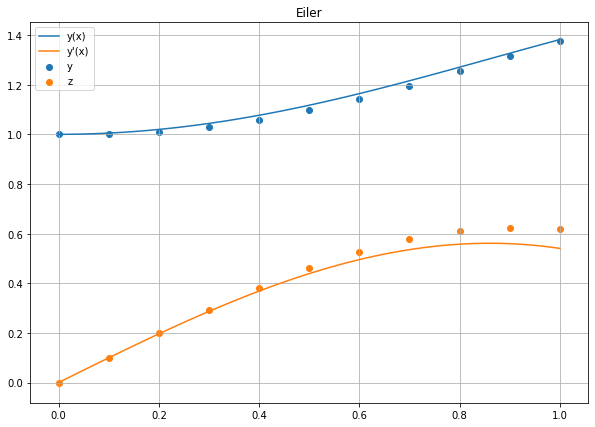

In [10]:
a = 0
b = 1
dx = 0.01

xarr = np.arange(a, b + dx, dx)
ylist = [f(x_) for x_ in xarr]
dylist = [dy(x_) for x_ in xarr]

plt.figure(figsize=(10,7))
plt.title('Eiler')
plt.plot(xarr, ylist)
plt.scatter(x1, y1)
plt.plot(xarr, dylist)
plt.scatter(x1, z1)
plt.legend(['y(x)', "y'(x)", 'y', 'z'])
plt.grid()
plt.show()

Метод Рунге-Кутты 4-го порядка:

\begin{cases}
    \Delta y_{k-1}=\frac{K_1^{k-1}+2K_2^{k-1}+2K_3^{k-1}+K_4^{k-1}}{6}
    \\
    \Delta z_{k-1}=\frac{L_1^{k-1}+2L_2^{k-1}+2L_3^{k-1}+L_4^{k-1}}{6}
    \\
    K_1^{k-1}=hz_{k-1}
    \\
    L_1^{k-1}=hf(x_{k-1},y_{k-1},z_{k-1})
    \\
    K_2^{k-1}=h(z_{k-1}+\frac{L_1^{k-1}}{2})
    \\
    L_2^{k-1}=hf(x_{k-1}+\frac{h}{2},y_{k-1}+\frac{K_1^{k-1}}{2},z_{k-1}+\frac{L_1^{k-1}}{2})
    \\
    K_3^{k-1}=h(z_{k-1}+\frac{L_2^{k-1}}{2})
    \\
    L_3^{k-1}=hf(x_{k-1}+\frac{h}{2},y_{k-1}+\frac{K_2^{k-1}}{2},z_{k-1}+\frac{L_2^{k-1}}{2})
    \\
    K_4^{k-1}=h(z_{k-1}+4L_3^{k-1})
    \\
    L_4^{k-1}=hf(x_{k-1}+h,y_{k-1}+K_3^{k-1},z_{k-1}+L_3^{k-1})
\end{cases}    

In [11]:
def delta(f, xk, yk, zk, h, flag):
    K1 = h * zk
    L1 = h * f(xk, yk, zk)

    K2 = h * (zk + 0.5 * L1)
    L2 = h * f(xk + 0.5 * h, yk + 0.5 * K1, zk + 0.5 * L1)
    
    K3 = h * (zk + 0.5 * L2)
    L3 = h * f(xk + 0.5 * h, yk + 0.5 * K2, zk + 0.5 * L2)
    
    K4 = h * (zk + L3)
    L4 = h * f(xk + h, yk + K3, zk + L3)
    
    if flag == True:
        return (K1 + 2 * K2 + 2 * K3 + K4) / 6
    return (L1 + 2 * L2 + 2 * L3 + L4) / 6

\begin{cases}
    y_k=y_{k-1}+\Delta y_{k-1}
    \\
    z_k=z_{k-1}+\Delta z_{k-1}
    \\
    x_k=x_{k-1}+h
\end{cases}

In [12]:
def Runge_Kutta_4(f=dz, y0=1, z0=0, h=0.1, a=0, b=1):
    x = np.arange(a, b + h, h)
    y = [y0]
    z = [z0]
    
    for i in range(1, len(x)):
        y.append(y[i - 1] + delta(f, x[i - 1], y[i - 1], z[i - 1], h, True))
        z.append(z[i - 1] + delta(f, x[i - 1], y[i - 1], z[i - 1], h, False))
    return x, y, z

Решение задачи Коши:

In [13]:
x1, y1, z1 = Runge_Kutta_4()
eps1 = eps(x1, y1)
eps2 = d_eps(x1, z1)
print("Погрешность метода Рунге-Кутты 4 порядка относительно точного решения: {}".format(eps1))
print("Погрешность метода Рунге-Кутты 4 порядка относительно первой производной: {}".format(eps2))
print()
x2, y2, z2 = Runge_Kutta_4(h=0.05)
print("Погрешность по Рунге-Ромбергу-Ридчардсону метода Рунге-Кутты 4 порядка: {}".format(RRR(y1, y2, 0.1, 0.05, 2)))
print("Погрешность по Рунге-Ромбергу-Ридчардсону явного метода Рунге-Кутты 4 порядка относительно первой производной: {}".format(RRR(z1, z2, 0.1, 0.05, 2)))

Погрешность метода Рунге-Кутты 4 порядка относительно точного решения: 1.9282188958038182e-06
Погрешность метода Рунге-Кутты 4 порядка относительно первой производной: 3.8697981148477315e-07

Погрешность по Рунге-Ромбергу-Ридчардсону метода Рунге-Кутты 4 порядка: 6.015445727739667e-07
Погрешность по Рунге-Ромбергу-Ридчардсону явного метода Рунге-Кутты 4 порядка относительно первой производной: 1.1989555460188181e-07


График точного решения, первой производной и полученных методом точек:

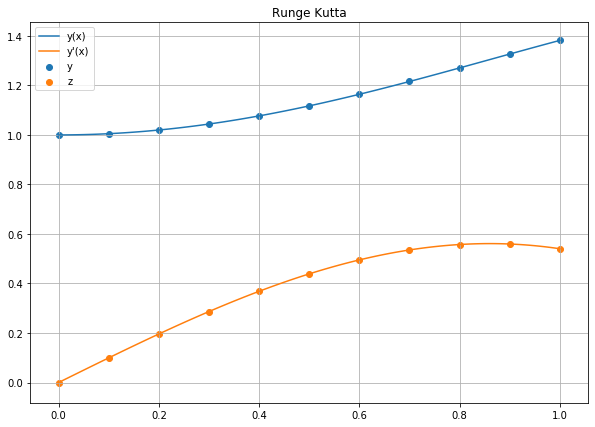

In [14]:
plt.figure(figsize=(10,7))
plt.title('Runge Kutta')
plt.plot(xarr, ylist)
plt.scatter(x1, y1)
plt.plot(xarr, dylist)
plt.scatter(x1, z1)
plt.legend(['y(x)', "y'(x)", 'y', 'z'])
plt.grid()
plt.show()

Метод Адамса:

\begin{cases}
    y_k=y_{k-1}+\frac{h}{24}(55z_{k-1}-59z_{k-2}+37z_{k-3}-9z_{k-4})
    \\
    z_k=y_{k-1}+\frac{h}{24}(55f_{k-1}-59f_{k-2}+37f_{k-3}-9f_{k-4})
    \\
    x_k=x_{k-1}+h
\end{cases}

где значения $y_1, y_2, y_3$ получены методом Рунге-Кутты 4-го порядка.

In [15]:
def Adams_4(f=dz, y0=1, z0=0, h=0.1, a=0, b=1):
    x, y, z = Runge_Kutta_4(f, y0, z0, h, a, b)
    y = y[:4]
    z = z[:4]
    for k in range(4, len(x)):
        y.append(y[k - 1] + (h / 24) * (55 * z[k - 1] - 59 * z[k - 2] + 37 * z[k - 3] - 9 * z[k - 4]))
        z.append(z[k - 1] + (h / 24) * (55 * f(x[k - 1], y[k - 1], z[k - 1]) - 59 * f(x[k - 2], y[k - 2], z[k - 2]) + 37 * f(x[k - 3], y[k - 3], z[k - 3]) - 9 * f(x[k - 4], y[k - 4], z[k - 4])))
    return x, y, z

Решение задачи Коши:

In [16]:
x1, y1, z1 = Adams_4()
eps1 = eps(x1, y1)
eps2 = d_eps(x1, z1)
print("Погрешность метода Адамса 4 порядка относительно точного решения: {}".format(eps1))
print("Погрешность метода Адамса 4 порядка относительно первой производной: {}".format(eps2))
print()
x2, y2, z2 = Adams_4(h=0.05)
print("Погрешность по Рунге-Ромбергу-Ридчардсону метода Адамса 4 порядка: {}".format(RRR(y1, y2, 0.1, 0.05, 2)))
print("Погрешность по Рунге-Ромбергу-Ридчардсону метода Адамса 4 порядка относительно первой производной: {}".format(RRR(z1, z2, 0.1, 0.05, 2)))

Погрешность метода Адамса 4 порядка относительно точного решения: 0.00013105888621506954
Погрешность метода Адамса 4 порядка относительно первой производной: 0.00014898663815534529

Погрешность по Рунге-Ромбергу-Ридчардсону метода Адамса 4 порядка: 3.9951561672204316e-05
Погрешность по Рунге-Ромбергу-Ридчардсону метода Адамса 4 порядка относительно первой производной: 4.582054044132409e-05


График точного решения, первой производной и полученных методом точек:


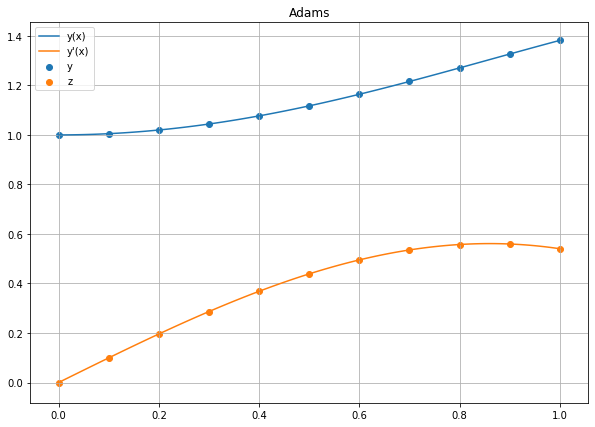

In [17]:
plt.figure(figsize=(10,7))
plt.title('Adams')
plt.plot(xarr, ylist)
plt.scatter(x1, y1)
plt.plot(xarr, dylist)
plt.scatter(x1, z1)
plt.legend(['y(x)', "y'(x)", 'y', 'z'])
plt.grid()
plt.show()

# Часть 2
### 4.2. Реализовать метод стрельбы и конечно-разностный метод решения краевой задачи для ОДУ в виде программ. С использованием разработанного программного обеспечения решить краевую задачу для обыкновенного дифференциального уравнения 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением. 

Краевая задача:

\begin{equation}
    xy''+2y'-xy=0
    \\
    y(1)=e^{-1}
    \\
    y(2)=0.5e^{-2}
\end{equation}

Точное решение:

\begin{equation}
    y(x)=\frac{e^{-x}}{x}
\end{equation}

In [18]:
def res(x):
    return math.exp(-x) / x 

Первая производная:

$y'(x)=-(x+1)e^{-x}x^{-2}$

In [19]:
def dy_(x):
    return -(x + 1) * math.exp(-x) * x ** (-2)

Вторая производная:

$y''(x)=e^{-x}(x^2+2x+2)x^{-3}$

In [20]:
def ddy_(x):
    return math.exp(-x) * (x ** 2 + 2 * x + 2) * x ** (-3)

Исходную систему второго порядка свожу к системе первого порядка заменой $z=y'$:

\begin{cases}
   z=y'
   \\
   z'=y-\frac{2z}{x}
   \\
   y(1)=e^{-1}
   \\
   y(2)=0.5e^{-2}
 \end{cases}

In [21]:
def f_xyz(x, y, z):
    return y - (2 * z) / x

Метод стрельбы заключается многократном решении задачи Коши для приближенного нахождения решения краевой задачи. Начальные условия задачи Коши будут иметь вид:

$y(a)=y_0$

$y'(a)=\eta$

где $\eta$ - значение тангенса угла наклона касательной к решению в точке $x=a$.

Решение задачи Коши будем осуществлять методом Рунге-Кутты 4-го порядка, а значение $\eta$ будем искать:

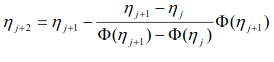

In [22]:
def shooting(f=f_xyz, y0=math.exp(-1), yn=0.5 * math.exp(-2), h=0.1, a=1, b=2, eps=0.0001, n0=None, n=None):
    if n == None:
        n = random.uniform(0, 1)
    if n0 == None:
        n0 = abs(n - random.uniform(0, 1))        
    k = 0
    while True:
        k += 1
        x_, y_, z_ = Runge_Kutta_4(f=f, y0=y0, z0=n0, h=h, a=a, b=b)
        x, y, z = Runge_Kutta_4(f=f, y0=y0, z0=n, h=h, a=a, b=b)
        e = abs(y[-1] - yn)
        if e <= eps:
            break
        temp = n
        n = n - (y[-1] - yn) * (n - n0) / ((y[-1] - yn) - (y_[-1] - yn))
        n0 = temp
    return x, y, z, k, e

Решение краевой задачи:

In [23]:
x1, y1, z1, k, epsilon = shooting()
eps1 = eps(x1, y1, res)
eps2 = d_eps(x1, z1, dy_)
print("Погрешность метода стрельбы относительно точного решения: {}".format(eps1))
print("Погрешность метода стрельбы относительно первой производной: {}".format(eps2))
print("Количество итераций метода стрельбы: {}".format(k))
print("Эпсилон метода стрельбы: {}".format(epsilon))
print()
x2, y2, z2, k, epsilon = shooting(h=0.05)
print("Погрешность по Рунге-Ромбергу-Ридчардсону метода стрельбы: {}".format(RRR(y1, y2, 0.1, 0.05, 2)))
print("Погрешность по Рунге-Ромбергу-Ридчардсону метода стрельбы относительно первой производной: {}".format(RRR(z1, z2, 0.1, 0.05, 2)))

Погрешность метода стрельбы относительно точного решения: 6.312373717607687e-06
Погрешность метода стрельбы относительно первой производной: 2.671259467476342e-05
Количество итераций метода стрельбы: 2
Эпсилон метода стрельбы: 2.3037127760972e-15

Погрешность по Рунге-Ромбергу-Ридчардсону метода стрельбы: 1.9835448844514994e-06
Погрешность по Рунге-Ромбергу-Ридчардсону метода стрельбы относительно первой производной: 8.388747272128364e-06


График точного решения, первой производной и полученных методом точек:


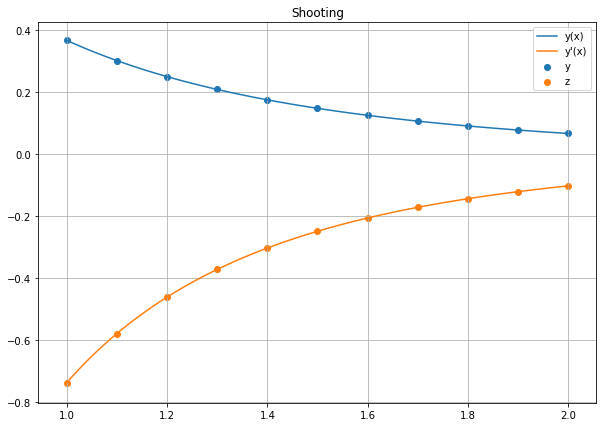

In [24]:
a = 1
b = 2
dx = 0.01

xarr = np.arange(a, b + dx, dx)
ylist = [res(x_) for x_ in xarr]
dylist = [dy_(x_) for x_ in xarr]

plt.figure(figsize=(10,7))
plt.title('Shooting')
plt.plot(xarr, ylist)
plt.scatter(x1, y1)
plt.plot(xarr, dylist)
plt.scatter(x1, z1)
plt.legend(['y(x)', "y'(x)", 'y', 'z'])
plt.grid()
plt.show()

Для конечно-разностного метода необходимо представить искомое уравнение в виде $y''+p(x)y'+q(x)y=f(x)$.

$p(x)=\frac{2}{x}$

In [25]:
def p(x):
    return 2 / x

$q(x)=-x$

In [26]:
def q(x):
    return -x

$f(x)=0$

In [27]:
def f(x):
    return 0

Значения функции определяются решением методом прогонки трехдиагональной системы уравнений вида: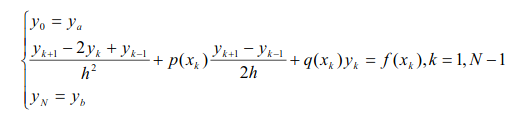

In [28]:
def razn(p=p, q=q, f=f, ya=math.exp(-1), yb=0.5 * math.exp(-2), h=0.1, a=1, b=2):
    A = []
    B = []
    rows = []
    x = np.arange(a, b + h, h)
    
    n = len(x)
    
    for i in range(n):
        if i == 0:
            rows.append(1)
        else:
            rows.append(0)
    A.append(rows)
    B.append(ya)
    
    for i in range(1, n - 1):
        rows = []
        B.append(f(x[i]))
        for j in range(n):            
            if j == i - 1:
                rows.append(1 / h ** 2 - p(x[i]) / (2 * h))
            elif i == j:
                rows.append(-2 / h ** 2 + q(x[i]))
            elif j == i + 1:
                rows.append(1 / h ** 2 + p(x[i]) / (2 * h))
            else:
                rows.append(0)
        A.append(rows)
    
    rows = []
    B.append(yb)
    
    for i in range(n):
        if i == n - 1:
            rows.append(1)
        else:
            rows.append(0)
            
    A.append(rows)    
    y = matrix.Progonka(matrix.Matrix(A), B)
    
    return x, y

Решение краевой задачи:

In [29]:
x1, y1 = razn()
eps1 = eps(x1, y1, res)
print("Погрешность конечно-разностного метода относительно точного решения: {}".format(eps1))
print()
x2, y2 = razn(h=0.05)
print("Погрешность по Рунге-Ромбергу-Ридчардсону конечно-разностного метода: {}".format(RRR(y1, y2, 0.1, 0.05, 2)))

Погрешность конечно-разностного метода относительно точного решения: 0.017387605954569972

Погрешность по Рунге-Ромбергу-Ридчардсону конечно-разностного метода: 1.962232908852973e-06


График точного решения и полученных методом точек:

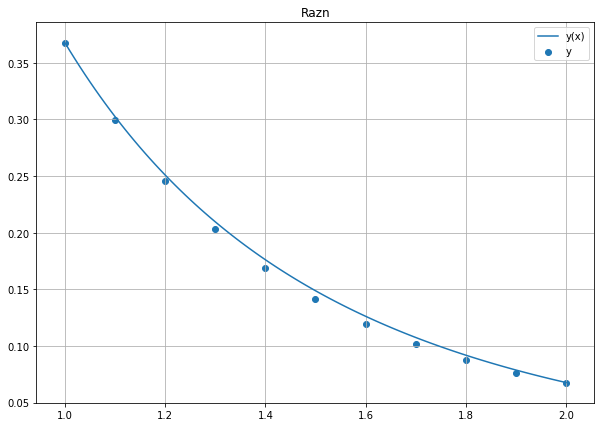

In [30]:
plt.figure(figsize=(10,7))
plt.title('Razn')
plt.plot(xarr, ylist)
plt.scatter(x1, y1)
plt.legend(['y(x)', 'y'])
plt.grid()
plt.show()